In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import requests
import re

url = 'https://en.wikipedia.org/wiki/List_of_former_United_States_senators'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
indiatable=soup.find_all('table',{'class':"wikitable"})

df=pd.read_html(str(indiatable).replace("<br/>", ","))

df=pd.DataFrame(df[1])
df = df[~df['Years'].str.contains('edit')]
df = df[~df['Years'].str.contains('Years')]


In [4]:
df2 = []

for ind, row in df.iterrows():
    # One of the entries doesn't have a -, so we need to clean it 
    if len(row['Years']) == 8:
        row['Years'] = f"{row['Years'][0:4]}–{row['Years'][4:8]}"
    for yrs in row['Years'].split(","):
        row['Served'] = yrs
        df2.append(dict(row))

In [5]:
df2 = pd.DataFrame(df2)

In [6]:
df2['Start'] = df2['Served'].str.split("–").str[0]
df2['End'] = df2['Served'].str.split("–").str[-1]
df2['Birth_Year'] = df2['Lifespan'].str.split("–").str[0].str.split("/").str[0].astype(int)

df2['Start'] = df2['Start'].astype(int)
df2['End'] = df2['End'].astype(int)

mean_age = {}

for year in range(min(df2['Start']), max(df2['Start']) + 1):
    tmp = df2[(df2['Start'] <= year) & (df2['End'] >= year)]
    ages = []
    for age in tmp['Birth_Year']:
        ages.append(year-age)
    mean_age[year] = ages

In [7]:
url = 'https://en.wikipedia.org/wiki/List_of_current_United_States_senators'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [8]:
indiatable=soup.find_all('table',{'class':"wikitable"})

df=pd.read_html(str(indiatable))

df=pd.DataFrame(df[4])
df

,State,Portrait,Senator,Party,Party.1,Born,Occupation(s),Previous electiveoffice(s),Education,Assumed office,Term up,Residence
0,Alabama,NaN,Richard Shelby,NaN,Republican[2],(age 87),Lawyer,U.S. HouseAlabama Senate,"University of Alabama (BA, LLB) Birmingham Sch...","January 3, 1987",2022,Tuscaloosa[3]
1,Alabama,NaN,Tommy Tuberville,NaN,Republican,(age 67),"College football coachPartner, investment mana...",None,Southern Arkansas University (BS),"January 3, 2021",2026,Auburn
2,Alaska,NaN,Lisa Murkowski,NaN,Republican,(age 64),Lawyer,Alaska House of Representatives,Georgetown University (AB) Willamette Universi...,"December 20, 2002[d]",2022,Girdwood[4]
3,Alaska,NaN,Dan Sullivan,NaN,Republican,(age 57),U.S. Marine Corps officerLawyerAssistant Secre...,Alaska Attorney General,Harvard University (AB) Georgetown University ...,"January 3, 2015",2026,Anchorage[5]
4,Arizona,NaN,Kyrsten Sinema,NaN,Democratic,(age 45),Social workerPolitical activistLawyerCollege l...,U.S. HouseArizona SenateArizona House of Repre...,Brigham Young University (BA) Arizona State Un...,"January 3, 2019",2024,Phoenix[6]
...,...,...,...,...,...,...,...,...,...,...,...,...
95,West Virginia,NaN,Shelley Moore Capito,NaN,Republican,(age 67),"College career counselorDirector, state Board ...",U.S. HouseWest Virginia House of Delegates,Duke University (BA) University of Virginia (MEd),"January 3, 2015",2026,Charleston
96,Wisconsin,NaN,Ron Johnson,NaN,Republican,(age 66),AccountantCorporate executive,None,University of Minnesota (BS),"January 3, 2011",2022,Oshkosh
97,Wisconsin,NaN,Tammy Baldwin,NaN,Democratic,(age 59),Lawyer,"U.S. HouseWisconsin AssemblyDane County, Wisco...",Smith College (BA) University of Wisconsin-Mad...,"January 3, 2013",2024,Madison
98,Wyoming,NaN,John Barrasso,NaN,Republican,(age 69),Orthopedic surgeonMedical chief of staffNonpro...,Wyoming Senate,Rensselaer Polytechnic Institute Georgetown Un...,"June 25, 2007[z]",2024,Casper


In [9]:
df['Start'] = df['Assumed office'].str.split(",").str[-1].str.split("[").str[0].astype(int)

df['Year_Born'] = 2021 - df['Born'].str.split("age").str[-1].str[1:3].astype(int)

In [10]:
lens = []
for year, ages in mean_age.items():
    tmp = df[df['Start'] <= year]
    for ind, row in tmp.iterrows():
        mean_age[year].append(year - row['Year_Born'])
    lens.append(len(mean_age[year]))

In [12]:
ages = []
for key, values in mean_age.items():
    ages.append(np.median(values))

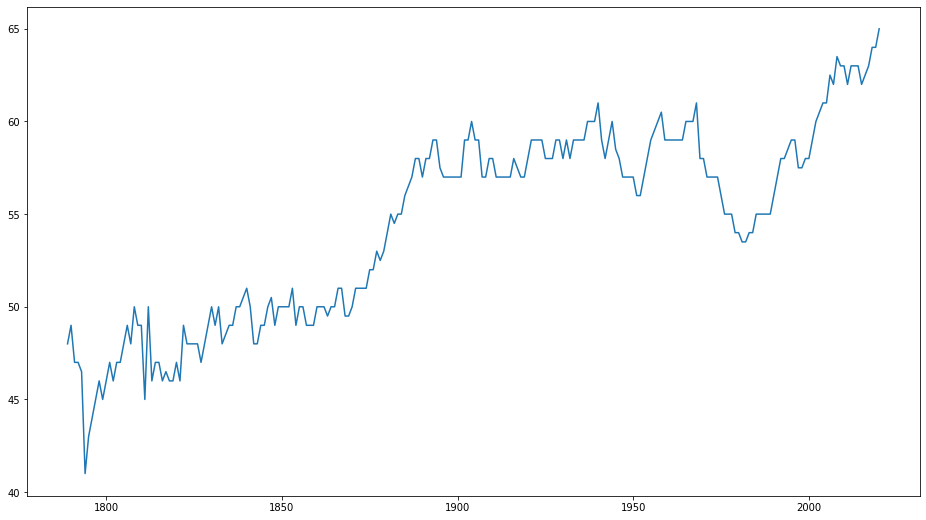

In [13]:
plt.figure(figsize=(16,9))
plt.plot(range(min(df2['Start']), max(df2['Start']) + 1), ages)